<a href="https://colab.research.google.com/github/FelipeVillegasH/Tareas_coding_dojo-Track1/blob/main/Catdog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## CatDog HouseHolds Analysis
# by: Felipe Villegas
## Created: 28.01.2022 
### Description: Graphic Analysis of the percentage and average number of pets per State and household in the US
### Code used:Seaborn Histograms and boxplots, Pandas and Mathplotlib Boxplots, .melt, .rcParams,  plt.subplots.

In [97]:
from google.colab import files 
from IPython.display import Image

In [100]:
uploaded= files.upload()

Saving Catdog1.png to Catdog1.png


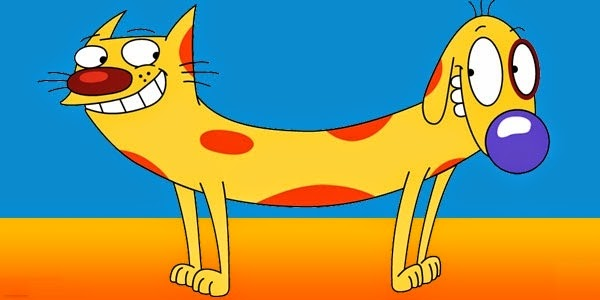

In [101]:
Image('Catdog1.png',
      width=600)

In [1]:
# import the libraries to use 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 

In [2]:
from google.colab import drive 
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df=pd.read_excel('/content/drive/MyDrive/CodingDojo/Track1/Semana 4/catsvdogs.xlsx')
df.head()

,Location,Number of Households (in 1000),Percentage of households with pets,Number of Pet Households (in 1000),Percentage of Dog Owners,Dog Owning Households (1000s),Mean Number of Dogs per household,Dog Population (in 1000),Percentage of Cat Owners,Cat Owning Households,Mean Number of Cats,Cat Population
0,Alabama,1828,59.5,1088,44.1,807,1.7,1410,27.4,501,2.5,1252
1,Arizona,2515,59.5,1497,40.1,1008,1.8,1798,29.6,743,1.9,1438
2,Arkansas,1148,62.4,716,47.9,550,2.0,1097,30.6,351,2.3,810
3,California,12974,52.9,6865,32.8,4260,1.6,6687,28.3,3687,1.9,7118
4,Colorado,1986,61.3,1217,42.5,845,1.6,1349,32.3,642,1.9,1191


In [4]:
df.info()
# the data is ready to be used 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 12 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Location                            49 non-null     object 
 1   Number of Households (in 1000)      49 non-null     int64  
 2   Percentage of households with pets  49 non-null     float64
 3   Number of Pet Households (in 1000)  49 non-null     int64  
 4   Percentage of Dog Owners            49 non-null     float64
 5   Dog Owning Households (1000s)       49 non-null     int64  
 6   Mean Number of Dogs per household   49 non-null     float64
 7   Dog Population (in 1000)            49 non-null     int64  
 8   Percentage of Cat Owners            49 non-null     float64
 9   Cat Owning Households               49 non-null     int64  
 10  Mean Number of Cats                 49 non-null     float64
 11  Cat Population                      49 non-null

In [5]:
sns.__version__
# with this version we can use more features of the new seaborn library which is the method we are about to use in this assignment

'0.11.2'

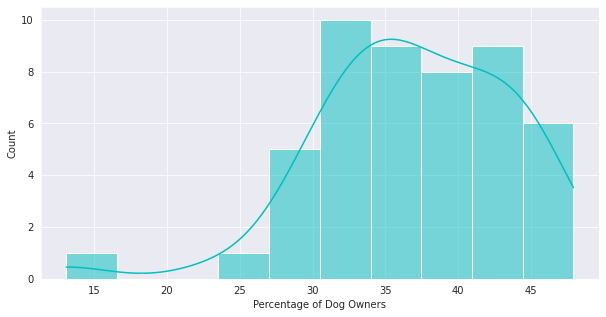

In [39]:
from matplotlib import figure
# the dark grid style helps us to draw the array lines for each axle 
sns.set_style('darkgrid')
plt.rcParams['figure.figsize']=(10,5)
sns.histplot(data=df, x='Percentage of Dog Owners',
             color='c',
             bins=10,
             kde=True, # kde helps us to mark a Gauss distribution line
             # binwidth=2
             # binrange=5
             # stat='probability'
             );

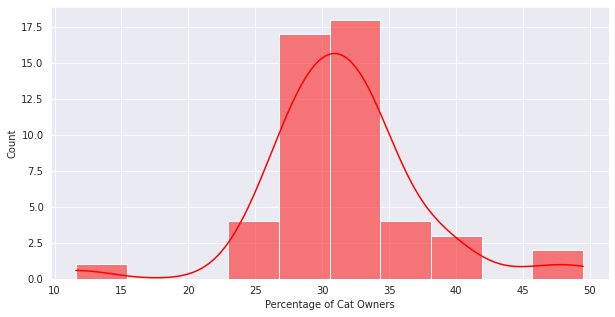

In [40]:
sns.histplot(data=df, x='Percentage of Cat Owners',
             color= 'r',
             kde=True,
             bins=10);

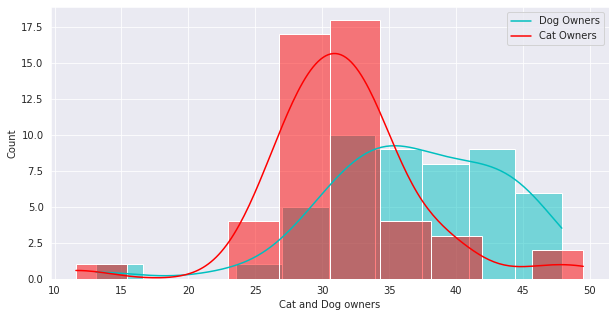

In [94]:
from inspect import stack
sns.histplot(data=df, x='Percentage of Dog Owners',
             legend=True,
             color='c',
             bins=10,
             kde=True,
             # element='step',
             # multiple='dodge'
             );
sns.histplot(data=df, x='Percentage of Cat Owners', 
             legend=True,
             color='r',
             bins=10,
             kde=True
             );
plt.xlabel('Cat and Dog owners');
plt.legend(['Dog Owners', 'Cat Owners']);
# Analysis:
# On average, the percentage of cat owners stands between 25% and 35% on the states
# On the other hand, the percentage of dog owners in average stands between 30% and 45% 
# Which means that at a 95% of confidence, in average 35% of the households owns cats and, between 30 and 45% of the households owns dogs

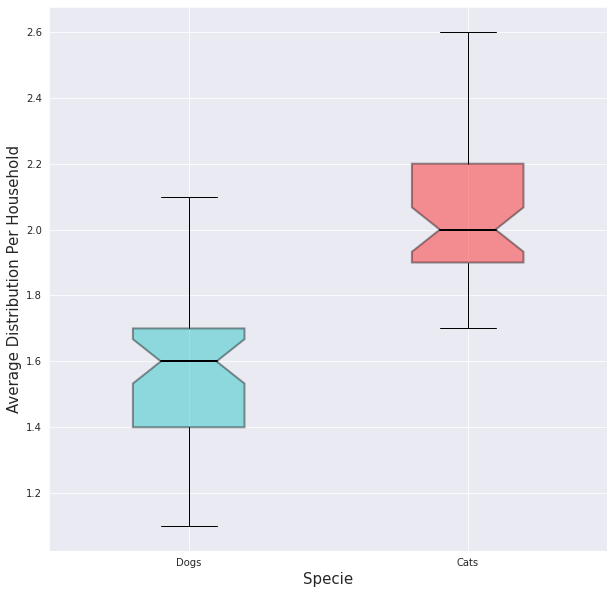

In [95]:
Average_dogs=df['Mean Number of Dogs per household']
Average_cats=df['Mean Number of Cats']
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize=(10,10))
boxplots = axes.boxplot([Average_dogs,Average_cats], 
             notch = True, #muesca
             labels=['Dogs', 'Cats'],
             widths = .4,
             patch_artist=True,
             medianprops = dict(linestyle='-', linewidth=2, color='k'),
             boxprops = dict(linestyle='=', linewidth=2, color='Black', facecolor = 'c', alpha = .4));
boxplot1 = boxplots['boxes'][1]
boxplot1.set_facecolor('red')
plt.xlabel('Specie', fontsize = 15);
plt.ylabel('Average Distribution Per Household', fontsize = 15);
plt.xticks(fontsize = 10);
plt.yticks(fontsize = 10);
# On average the mean number of cats per household is superior than the mean number of dogs per house old by 0.4 units
# On average in the states cats households have 2 cats, meanwhile dog households own 1.6 dogs at a 95% confidence 

In [70]:
# Boxplot with Seaborn, using melt: 
# first we set up the new data base considering the average number of pets by specie 
# this column will be usefull to then use ir as a parameter on the 'hue' attribute of the sns.boxplot 
df1= df.melt(id_vars=['Location','Number of Households (in 1000)','Number of Pet Households (in 1000)','Percentage of Dog Owners','Dog Owning Households (1000s)','Dog Population (in 1000)','Percentage of Cat Owners','Cat Owning Households','Cat Population'],
             value_vars=['Mean Number of Dogs per household','Mean Number of Cats'],
             var_name='Average_number_by_specie',
             value_name='Mean_Pet_value_by_household')
df1

,Location,Number of Households (in 1000),Number of Pet Households (in 1000),Percentage of Dog Owners,Dog Owning Households (1000s),Dog Population (in 1000),Percentage of Cat Owners,Cat Owning Households,Cat Population,Average_number_by_specie,Mean_Pet_value_by_household
0,Alabama,1828,1088,44.1,807,1410,27.4,501,1252,Mean Number of Dogs per household,1.7
1,Arizona,2515,1497,40.1,1008,1798,29.6,743,1438,Mean Number of Dogs per household,1.8
2,Arkansas,1148,716,47.9,550,1097,30.6,351,810,Mean Number of Dogs per household,2.0
3,California,12974,6865,32.8,4260,6687,28.3,3687,7118,Mean Number of Dogs per household,1.6
4,Colorado,1986,1217,42.5,845,1349,32.3,642,1191,Mean Number of Dogs per household,1.6
...,...,...,...,...,...,...,...,...,...,...,...
93,Virginia,3017,1611,35.4,1069,1699,29.0,876,1855,Mean Number of Cats,2.1
94,Washington,2632,1649,36.3,954,1609,39.0,1028,1844,Mean Number of Cats,1.8
95,West Virginia,765,475,45.8,350,648,38.1,291,628,Mean Number of Cats,2.2
96,Wisconsin,2350,1352,33.9,796,1138,33.0,776,1510,Mean Number of Cats,1.9


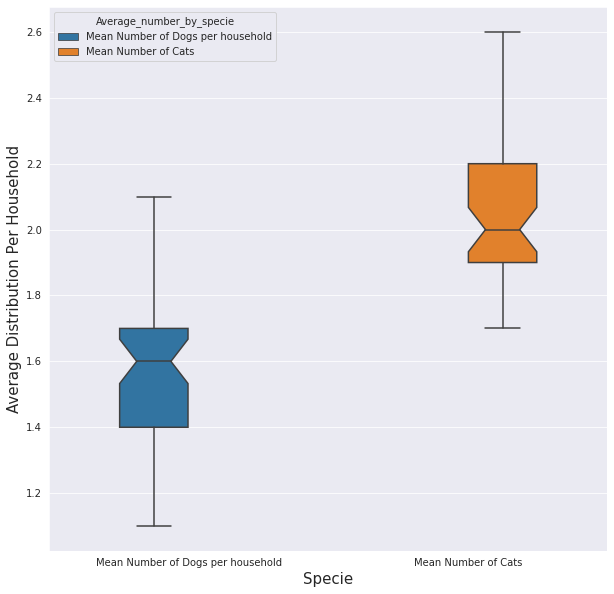

In [86]:
from IPython.core.pylabtools import figsize
# now we ilustrate the bosxplots with seaborn
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize=(10,10))
sns.boxplot(data=df1, x='Average_number_by_specie', y='Mean_Pet_value_by_household', 
            hue='Average_number_by_specie', 
            notch=True,
            width=0.5, 
            dodge=True);
plt.xlabel('Specie', fontsize = 15);
plt.ylabel('Average Distribution Per Household', fontsize = 15);